In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

image = Image.open('palm_tree.jpg')
image_np = np.array(image)


In [3]:
print("Kody RGB dla każdego piksela:")
print(image_np)

Kody RGB dla każdego piksela:
[[[ 28  35  63]
  [ 35  50  83]
  [ 98 118 153]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[ 25  29  56]
  [ 36  47  79]
  [ 98 117 150]
  ...
  [  3   3   3]
  [  3   3   3]
  [  4   4   4]]

 [[ 25  23  47]
  [ 36  43  72]
  [ 98 113 146]
  ...
  [  3   3   3]
  [  4   4   4]
  [  4   4   4]]

 ...

 [[ 46  32  31]
  [ 44  30  29]
  [ 49  34  31]
  ...
  [ 35  25  23]
  [ 36  26  24]
  [ 36  26  24]]

 [[ 36  20  20]
  [ 47  31  31]
  [ 59  41  39]
  ...
  [ 42  32  30]
  [ 39  29  27]
  [ 37  27  25]]

 [[ 41  27  26]
  [ 49  33  33]
  [ 58  40  38]
  ...
  [ 59  43  43]
  [ 51  37  36]
  [ 46  32  31]]]


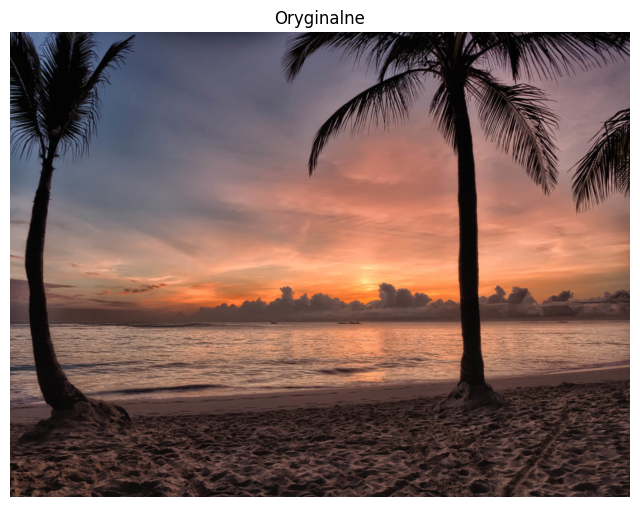

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("Oryginalne")
plt.axis('off')
plt.show()

In [6]:
height, width, channels = image_np.shape
print(f"Rozmiary zdjęcia: {width} x {height}, Liczba kanałów kolorów: {channels}")

Rozmiary zdjęcia: 1100 x 825, Liczba kanałów kolorów: 3


In [7]:
pixels = image_np.reshape(-1, channels)

In [8]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(pixels)

KMeans(n_clusters=6, random_state=42)

In [9]:
labels = kmeans.labels_
print("Etykiety klastrów dla każdego piksela:")
print(labels.reshape(height, width))

Etykiety klastrów dla każdego piksela:
[[4 1 2 ... 4 4 4]
 [4 1 2 ... 4 4 4]
 [4 1 2 ... 4 4 4]
 ...
 [4 4 4 ... 4 4 4]
 [4 4 1 ... 4 4 4]
 [4 4 1 ... 1 1 4]]


In [10]:
centroids = kmeans.cluster_centers_
print("Współrzędne centroidów:")
print(centroids)

Współrzędne centroidów:
[[144.16113952 115.8572963  112.09586089]
 [ 76.52839599  55.35968422  53.07647424]
 [ 99.65330218  94.73421167 108.62392137]
 [234.204125   154.64958728 114.29867123]
 [ 24.1517086   16.59534821  16.31434705]
 [185.27100511 130.96160228 111.25947998]]


In [11]:
centroids_rounded = np.round(centroids, 0).astype(int)
print("Zaokrąglone współrzędne centroidów (RGB):")
print(centroids_rounded)

Zaokrąglone współrzędne centroidów (RGB):
[[144 116 112]
 [ 77  55  53]
 [100  95 109]
 [234 155 114]
 [ 24  17  16]
 [185 131 111]]


In [12]:
quantized_image = centroids_rounded[labels].reshape(height, width, channels)

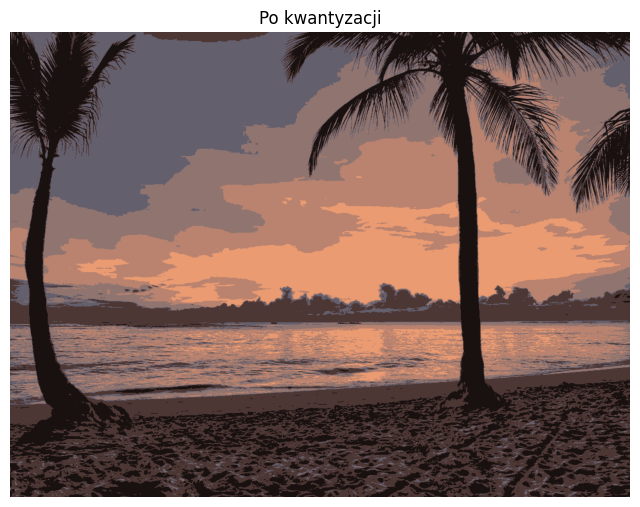

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(quantized_image)
plt.title("Po kwantyzacji")
plt.axis('off')
plt.show()